## Cohort Analysis

Cohort analysis involves dividing users into distinct groups, or cohorts, based on certain criteria. In this case study, these cohorts are defined by the time of user acquisition. By grouping users together based on time of acquisition, we can study how different cohorts behave in terms of engagement and retention.

In [2]:
# Import the relevant libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [3]:
# Loading the dataset

df = pd.read_csv(R"C:\Users\Admin\Desktop\Ecommerce_Cohort_Analysis_Project\data\Dataset_ecommerce.csv")
df

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda
...,...,...,...,...,...,...,...,...
541904,581587,2011-12-09 12:50:00,12680.0,SC5440,Furniture,25,36.53,Mozambique
541905,581587,2011-12-09 12:50:00,12680.0,SC3576,Cloths,94,90.65,Tunisia
541906,581587,2011-12-09 12:50:00,12680.0,SC5283,Furniture,14,40.07,Somalia
541907,581587,2011-12-09 12:50:00,12680.0,SC1099,Cosmetics,45,79.83,Senegal


The dataset has 541,909 rows of data and 8 columns

In [4]:
df.describe()

,CustomerID,Quantity,UnitPrice
count,406829.000000,541909.000000,541909.000000
mean,15287.690570,50.534748,50.476354
std,1713.600303,28.849367,28.564775
min,12346.000000,1.000000,1.000000
25%,13953.000000,26.000000,25.750000
50%,15152.000000,51.000000,50.430000
75%,16791.000000,76.000000,75.180000
max,18287.000000,100.000000,100.000000


<Axes: >

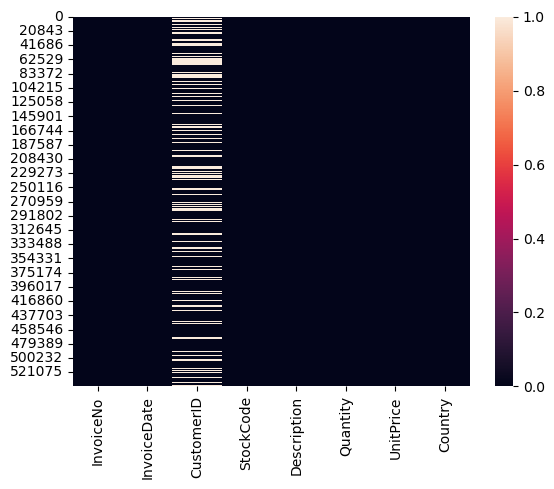

In [5]:
# checking and visualizing for missing value
df.isnull().sum()
sns.heatmap(df.isnull())

There are 135,080 missing customer id in the dataset

In [6]:
#drop all missing value
df.dropna(inplace=True)

<Axes: >

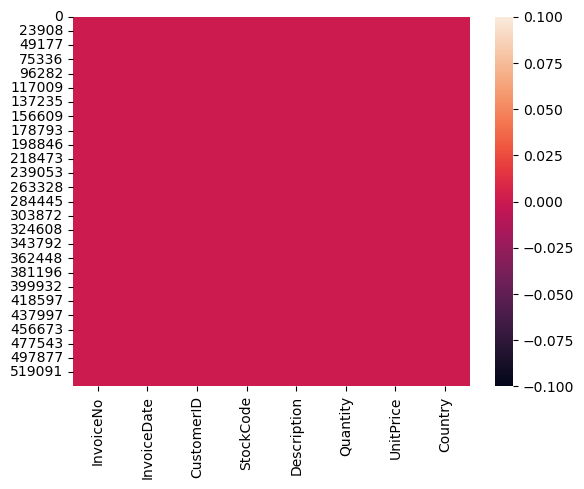

In [7]:
# Reconfirmig and visualizing the missing data
df.isnull().sum()
sns.heatmap(df.isnull())

In [8]:
#checking for info on the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   InvoiceDate  406829 non-null  object 
 2   CustomerID   406829 non-null  float64
 3   StockCode    406829 non-null  object 
 4   Description  406829 non-null  object 
 5   Quantity     406829 non-null  int64  
 6   UnitPrice    406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [9]:
# Convert invoice date to date time format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [10]:
df.duplicated().sum()

0

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   InvoiceDate  406829 non-null  datetime64[ns]
 2   CustomerID   406829 non-null  float64       
 3   StockCode    406829 non-null  object        
 4   Description  406829 non-null  object        
 5   Quantity     406829 non-null  int64         
 6   UnitPrice    406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [12]:
df['Description'].value_counts()

Description
Jewelry             41017
Sports Equipment    40983
Toys                40829
Furniture           40770
Shoes               40769
Kitchenware         40754
Cloths              40630
Cosmetics           40492
Electronics         40404
Books               40181
Name: count, dtype: int64

## Exploratory Data Analysis

In [13]:
df.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda


In [14]:
# Creating the Total Price feature
df['TotalPrice'] = df['Quantity']*df['UnitPrice']
df.head(2)

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,TotalPrice
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt,664.95
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali,1862.95


In [15]:
df['InvoiceYear'] = df['InvoiceDate'].dt.year

df['Quarter'] = df['InvoiceDate'].dt.quarter

df['Year_Month'] = df['InvoiceDate'].dt.strftime('%Y-%b')

# Create a 'Year-Quarter' column for better plotting
df['Year_Quarter'] = df['InvoiceYear'].astype(str) + '-Q' + df['Quarter'].astype(str)

# Ensure correct sorting
df = df.sort_values(by=['InvoiceYear', 'Quarter'])

df.head(2)

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,TotalPrice,InvoiceYear,Quarter,Year_Month,Year_Quarter
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt,664.95,2010,4,2010-Dec,2010-Q4
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali,1862.95,2010,4,2010-Dec,2010-Q4


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     406829 non-null  object        
 1   InvoiceDate   406829 non-null  datetime64[ns]
 2   CustomerID    406829 non-null  float64       
 3   StockCode     406829 non-null  object        
 4   Description   406829 non-null  object        
 5   Quantity      406829 non-null  int64         
 6   UnitPrice     406829 non-null  float64       
 7   Country       406829 non-null  object        
 8   TotalPrice    406829 non-null  float64       
 9   InvoiceYear   406829 non-null  int32         
 10  Quarter       406829 non-null  int32         
 11  Year_Month    406829 non-null  object        
 12  Year_Quarter  406829 non-null  object        
dtypes: datetime64[ns](1), float64(3), int32(2), int64(1), object(6)
memory usage: 40.4+ MB


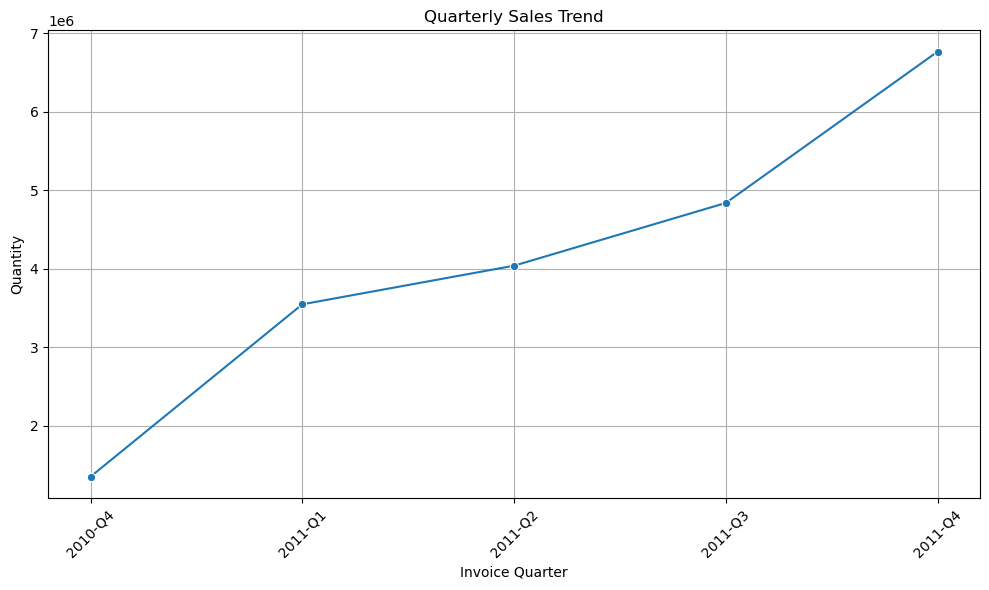

In [17]:
# Reviewing sales trend
# Group by YearMonth and Description (Product), and sum Quantity
Quaterly_sales = df.groupby(['Year_Quarter'])['Quantity'].sum().reset_index()


plt.figure(figsize=(10,6))
sns.lineplot(x='Year_Quarter', y='Quantity', data=Quaterly_sales, marker = 'o')
plt.title('Quarterly Sales Trend')
plt.xlabel('Invoice Quarter')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### Observations

From the graph above, revenue increased consistently across all quarters with its peak in the 4th quarter of 2011

2010 Q4 to 2011 Q1: A sharp increase in sales quantity noted.
2011 Q1 to 2011 Q3: A steady increase occurred.
2011 Q3 to 2011 Q4: Sales experienced a further sharp increase.

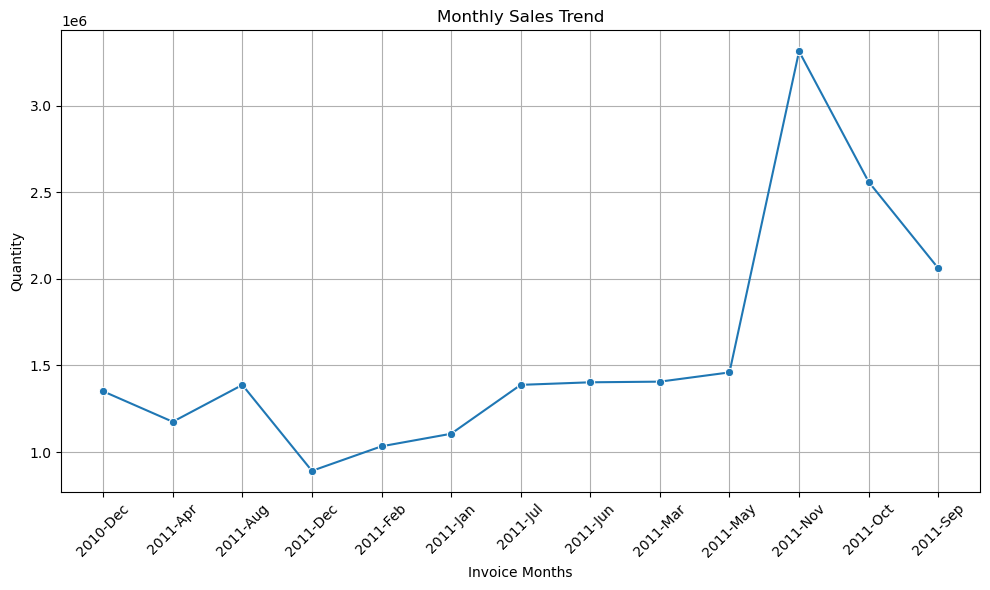

In [18]:
# Group by YearMonth and Description (Product), and sum Quantity
monthly_Quantity_sales = df.groupby(['Year_Month'])['Quantity'].sum().reset_index()


plt.figure(figsize=(10,6))
sns.lineplot(x='Year_Month', y='Quantity', data=monthly_Quantity_sales, marker = 'o')
plt.title('Monthly Sales Trend')
plt.xlabel('Invoice Months')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

The monthly sales trend shows sales peak in November 2011 and dropped subsequently

In [19]:
df['Country'].value_counts()

Country
Nigeria          14714
Sierra Leone     14684
Somalia          14656
Cote d'Ivoire    14645
Mozambique       14639
Cameroon         14619
Senegal          14616
Benin            14610
Ghana            14604
Libya            14585
Zimbabwe         14572
Ethiopia         14565
Rwanda           14563
Togo             14560
Morocco          14530
Sudan            14530
Kenya            14525
Algeria          14492
South Africa     14469
Egypt            14456
Niger            14455
Tunisia          14452
Uganda           14450
Burkina Faso     14413
Zambia           14397
Tanzania         14390
Mali             14319
Madagascar       14319
Name: count, dtype: int64

In [20]:
countries_by_sales = df.groupby(['Country'])['TotalPrice'].sum().reset_index()
countries_by_sales = countries_by_sales.sort_values('TotalPrice', ascending=False)
countries_by_sales

,Country,TotalPrice
9,Libya,37690362.35
19,Somalia,37663830.57
23,Togo,37592496.96
11,Mali,37508467.02
7,Ghana,37414593.40
15,Nigeria,37364243.60
6,Ethiopia,37228695.13
13,Mozambique,37145464.36
18,Sierra Leone,37140824.43
0,Algeria,37140683.52


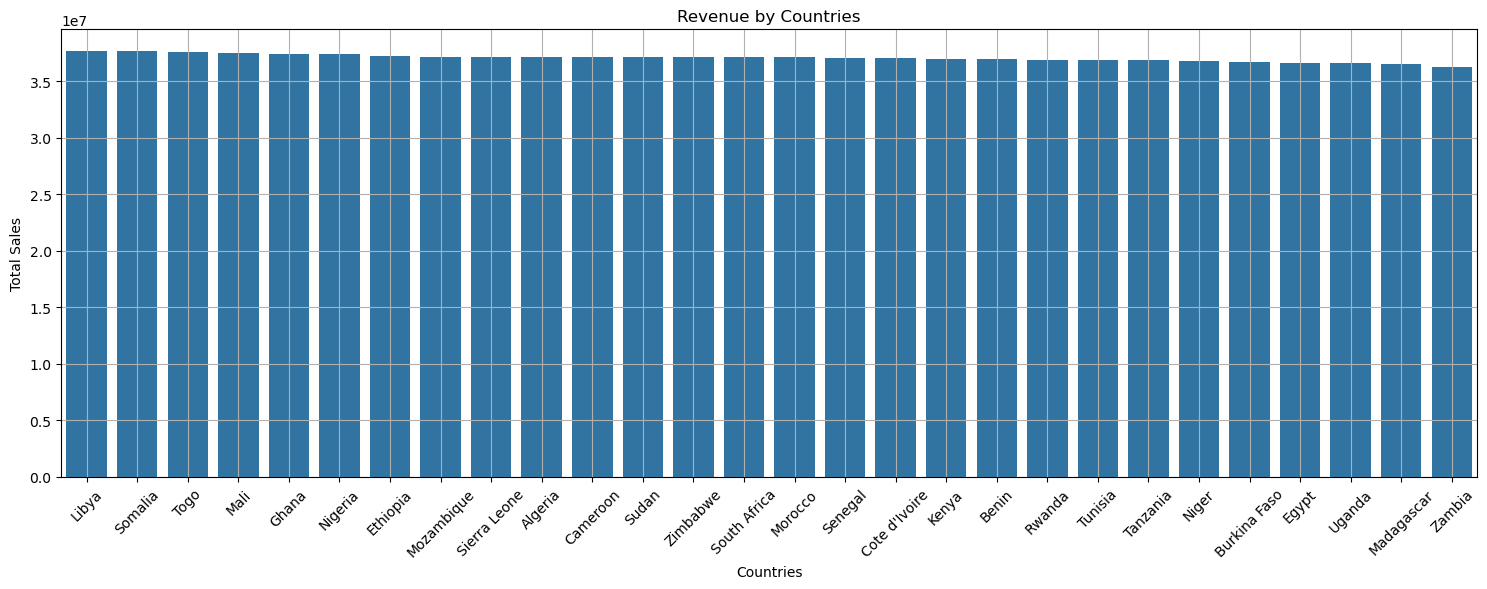

In [21]:
# Reviweing countries and their total sales

#top_countries_by_sales = df.sort_values(by='TotalPrice', ascending=False)


plt.figure(figsize=(15,6))
sns.barplot(x='Country', y='TotalPrice', data= countries_by_sales)

plt.title('Revenue by Countries')
plt.xlabel('Countries')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

It is observed that the revenue margin among the countries is slim

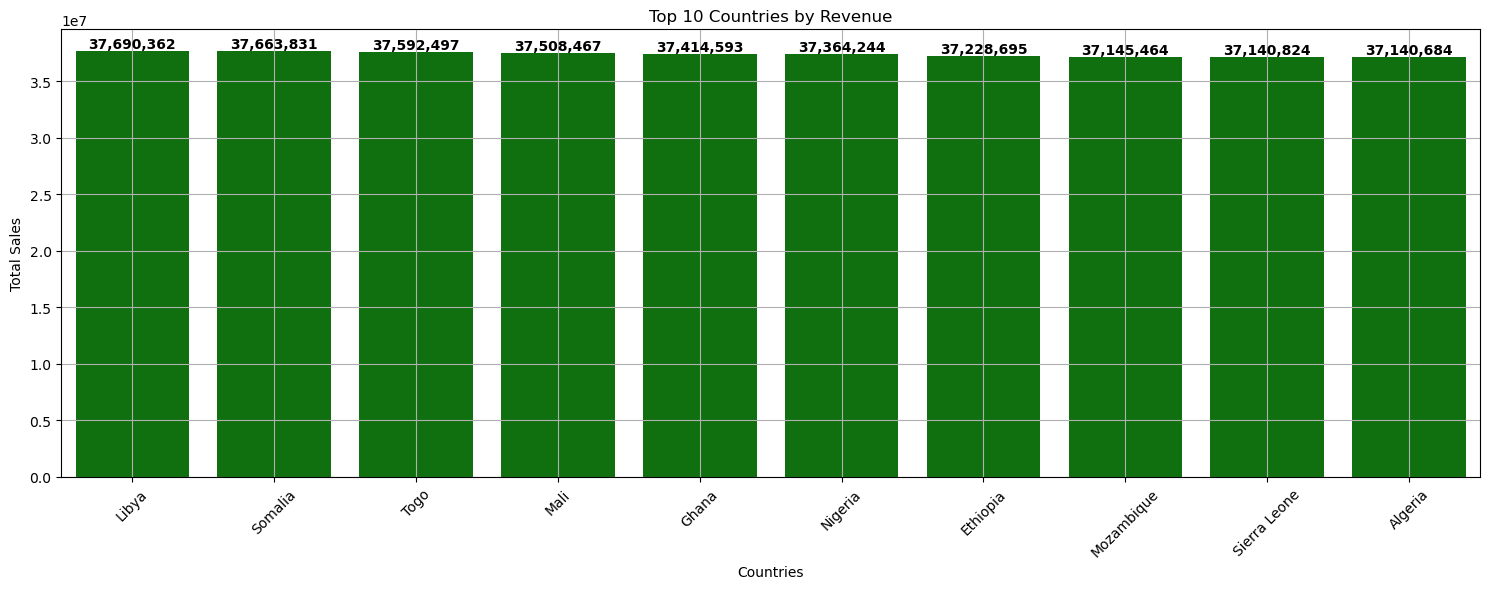

In [22]:
# Visualizing top 10 countries and revenue

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,6))
barplot = sns.barplot(x='Country', y='TotalPrice', data=countries_by_sales.head(10), color = 'green')

plt.title('Top 10 Countries by Revenue')
plt.xlabel('Countries')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)

# Add labels on bars
for p in barplot.patches:
    height = p.get_height()
    barplot.text(
        x=p.get_x() + p.get_width() / 2, 
        y=height, 
        s=f'{height:,.0f}',  # Comma formatting & no decimals
        ha='center', 
        va='bottom', 
        fontsize=10, 
        fontweight='bold'
    )

plt.tight_layout()
plt.show()


The barchat shows top 10 countries with the highest revenues with Libya being the topmost.

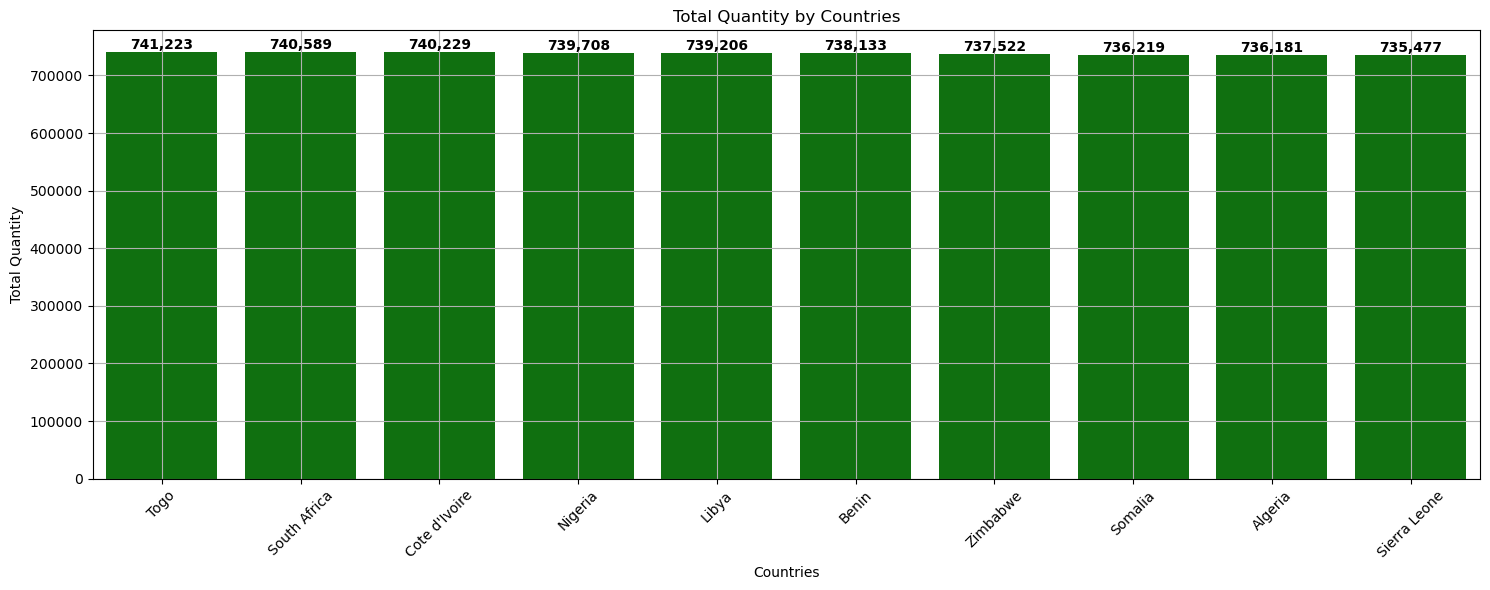

In [23]:
countries_by_quantity = df.groupby(['Country'])['Quantity'].sum().reset_index().sort_values('Quantity', ascending=False)
countries_by_quantity = countries_by_quantity.head(10)

plt.figure(figsize=(15,6))
barplot = sns.barplot(x='Country', y='Quantity', data= countries_by_quantity, color='green')

plt.title('Total Quantity by Countries')
plt.xlabel('Countries')
plt.ylabel('Total Quantity')
plt.xticks(rotation=45)
plt.grid(True)

# Add labels on bars
for p in barplot.patches:
    height = p.get_height()
    barplot.text(
        x=p.get_x() + p.get_width() / 2, 
        y=height, 
        s=f'{height:,.0f}',  # Comma formatting & no decimals
        ha='center', 
        va='bottom', 
        fontsize=10, 
        fontweight='bold'
    )

plt.tight_layout()
plt.show()

The above shows the total quantity by countries with Togo having the highest quantity.

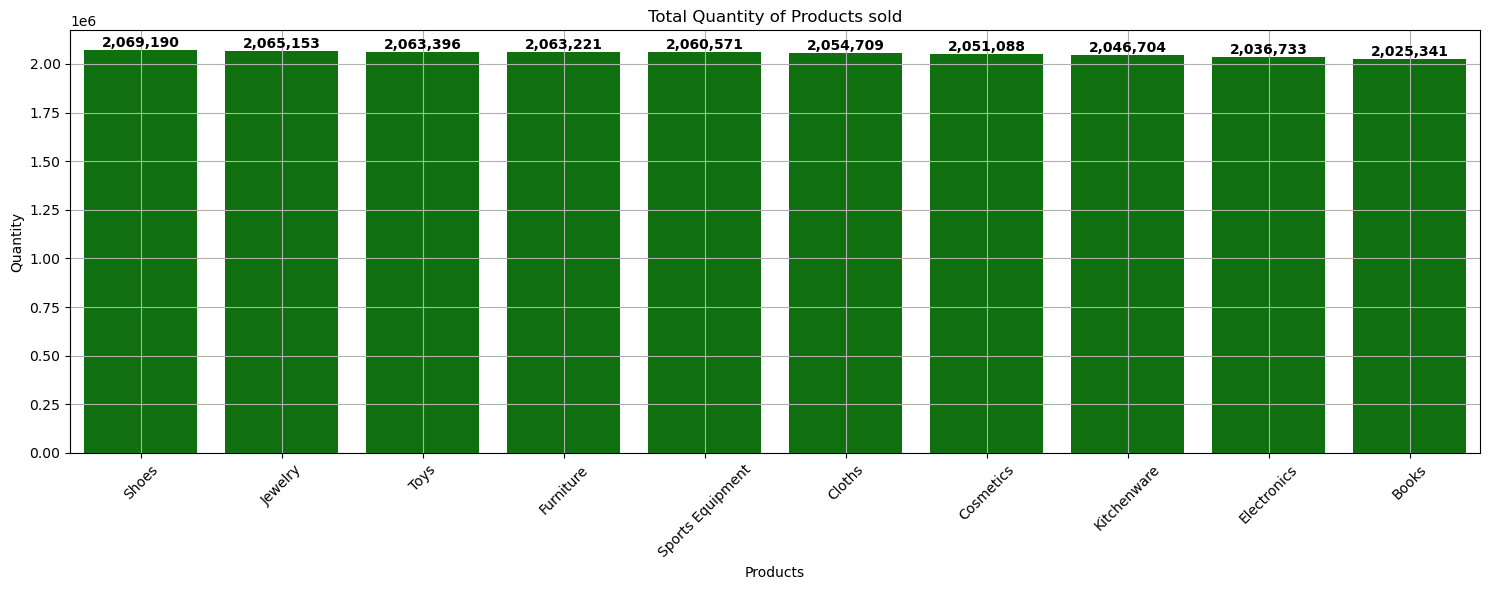

In [24]:
Prd_qty_sold = df.groupby(df['Description'])['Quantity'].sum().reset_index().sort_values(by='Quantity', ascending = False)
Prd_qty_sold

plt.figure(figsize=(15,6))
barplot = sns.barplot(x='Description', y='Quantity', data= Prd_qty_sold, color='green')

# Add labels on bars
for p in barplot.patches:
    height = p.get_height()
    barplot.text(
        x=p.get_x() + p.get_width() / 2, 
        y=height, 
        s=f'{height:,.0f}',  # Comma formatting & no decimals
        ha='center', 
        va='bottom', 
        fontsize=10, 
        fontweight='bold'
    )

plt.title('Total Quantity of Products sold')
plt.xlabel('Products')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Shoes product category is the highest product sold and books the lowest

In [25]:
# Highest selling products per country

prd_sold_per_country = df.groupby(['Country', 'Description'])['Quantity'].sum().reset_index()

top_prd_sold = prd_sold_per_country.sort_values(['Country', 'Quantity'], ascending=[True, False] )

top_prd_sold_per_country = top_prd_sold.groupby('Country').head(1).reset_index(drop=True).sort_values('Quantity', ascending=False)

print(top_prd_sold_per_country)




          Country       Description  Quantity
3        Cameroon         Cosmetics     79424
19        Somalia             Shoes     79061
1           Benin       Kitchenware     78259
11           Mali              Toys     78205
4   Cote d'Ivoire         Cosmetics     77794
20   South Africa             Shoes     77394
10     Madagascar       Electronics     77392
16         Rwanda            Cloths     77216
15        Nigeria  Sports Equipment     76964
0         Algeria             Shoes     76919
6        Ethiopia         Furniture     76825
23           Togo           Jewelry     76762
18   Sierra Leone       Electronics     76753
13     Mozambique             Books     76612
7           Ghana              Toys     76593
24        Tunisia             Shoes     76560
27       Zimbabwe            Cloths     76419
25         Uganda       Electronics     76163
14          Niger         Furniture     75917
26         Zambia           Jewelry     75896
9           Libya             Shoe

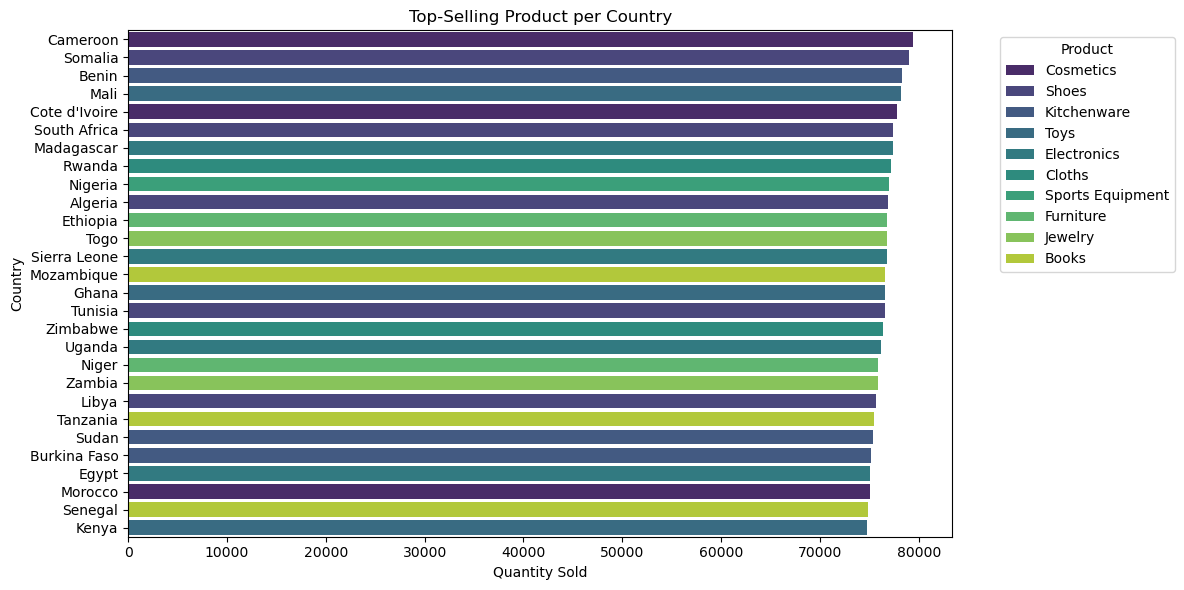

In [26]:
# Visualizing the Highest selling products per country

# Sort for better visual order
#top_prd_sold_per_country = top_prd_sold_per_country.sort_values('Quantity', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Quantity', y='Country', hue='Description', data=top_prd_sold_per_country, dodge=False, palette='viridis')

plt.title('Top-Selling Product per Country')
plt.xlabel('Quantity Sold')
plt.ylabel('Country')
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


This visual shows the different products sold most in different countries, with cosmetic products being the highest sold in Cameroon

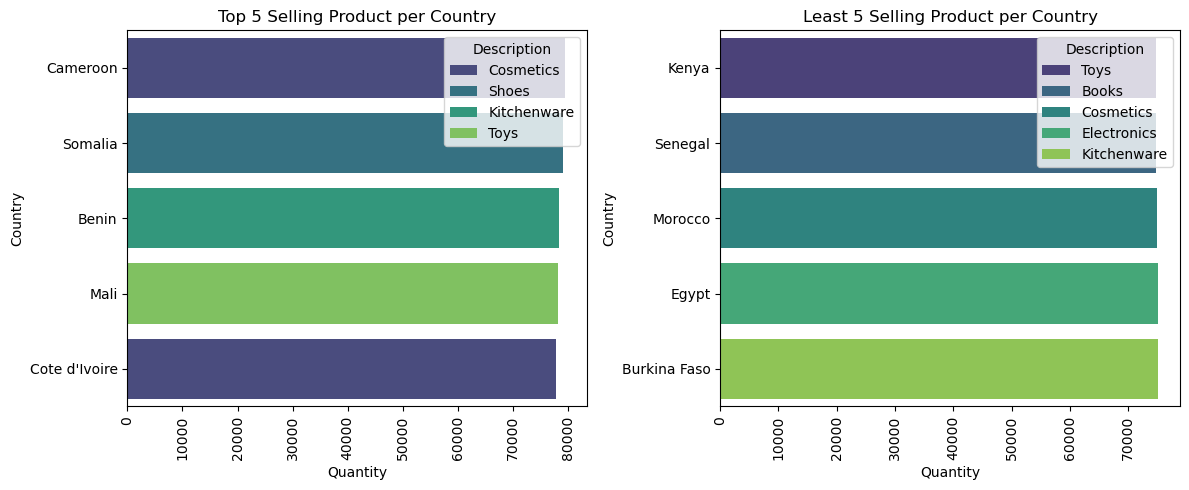

In [27]:
import warnings

warnings.filterwarnings("ignore")

top_prd_sold_per_country = top_prd_sold.groupby('Country').head(1).reset_index(drop=True).sort_values('Quantity', ascending=False)[:5]

least_prd_sold_per_country = top_prd_sold.groupby('Country').head(1).reset_index(drop=True).sort_values('Quantity', ascending=True)[:5]

plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)

sns.barplot(x='Quantity', y='Country', hue='Description', data=top_prd_sold_per_country, dodge=False, palette='viridis')
plt.title('Top 5 Selling Product per Country')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.barplot(x='Quantity', y='Country', hue='Description', data=least_prd_sold_per_country, dodge=False, palette='viridis')
plt.title('Least 5 Selling Product per Country')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [28]:
df.head(2)

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,TotalPrice,InvoiceYear,Quarter,Year_Month,Year_Quarter
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt,664.95,2010,4,2010-Dec,2010-Q4
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali,1862.95,2010,4,2010-Dec,2010-Q4


In [29]:
# date conversion to datetime formats

#df['Year_Month'] = pd.to_datetime(df['Year_Month'])


# Ensure InvoiceDate is datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Create a datetime-based column for sorting
df['Year_Month'] = df['InvoiceDate'].dt.to_period('M').dt.to_timestamp()

# Create a string label for display (e.g., '2024-Jan')
df['Year_Month'] = df['InvoiceDate'].dt.strftime('%Y-%b')
df.head(2)


,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,TotalPrice,InvoiceYear,Quarter,Year_Month,Year_Quarter
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt,664.95,2010,4,2010-Dec,2010-Q4
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali,1862.95,2010,4,2010-Dec,2010-Q4


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     406829 non-null  object        
 1   InvoiceDate   406829 non-null  datetime64[ns]
 2   CustomerID    406829 non-null  float64       
 3   StockCode     406829 non-null  object        
 4   Description   406829 non-null  object        
 5   Quantity      406829 non-null  int64         
 6   UnitPrice     406829 non-null  float64       
 7   Country       406829 non-null  object        
 8   TotalPrice    406829 non-null  float64       
 9   InvoiceYear   406829 non-null  int32         
 10  Quarter       406829 non-null  int32         
 11  Year_Month    406829 non-null  object        
 12  Year_Quarter  406829 non-null  object        
dtypes: datetime64[ns](1), float64(3), int32(2), int64(1), object(6)
memory usage: 40.4+ MB


In [31]:
# Investigating Products sold over time


# Group by YearMonth and Description (Product), and sum Quantity
monthly_product_sales = df.groupby(['Year_Month', 'Description'])['Quantity'].sum().reset_index()

# Get the top-selling product each month
top_products_by_month = monthly_product_sales.sort_values(['Year_Month', 'Quantity'], ascending=[True, False])

top_products_by_month = top_products_by_month.groupby('Year_Month').head(1).reset_index(drop=True)

print(top_products_by_month)

   Year_Month       Description  Quantity
0    2010-Dec           Jewelry    138013
1    2011-Apr             Shoes    120068
2    2011-Aug       Kitchenware    142308
3    2011-Dec             Shoes     93467
4    2011-Feb  Sports Equipment    107309
5    2011-Jan         Furniture    116273
6    2011-Jul         Furniture    143194
7    2011-Jun              Toys    144463
8    2011-Mar              Toys    143576
9    2011-May              Toys    148978
10   2011-Nov           Jewelry    338612
11   2011-Oct         Cosmetics    261523
12   2011-Sep             Shoes    213802


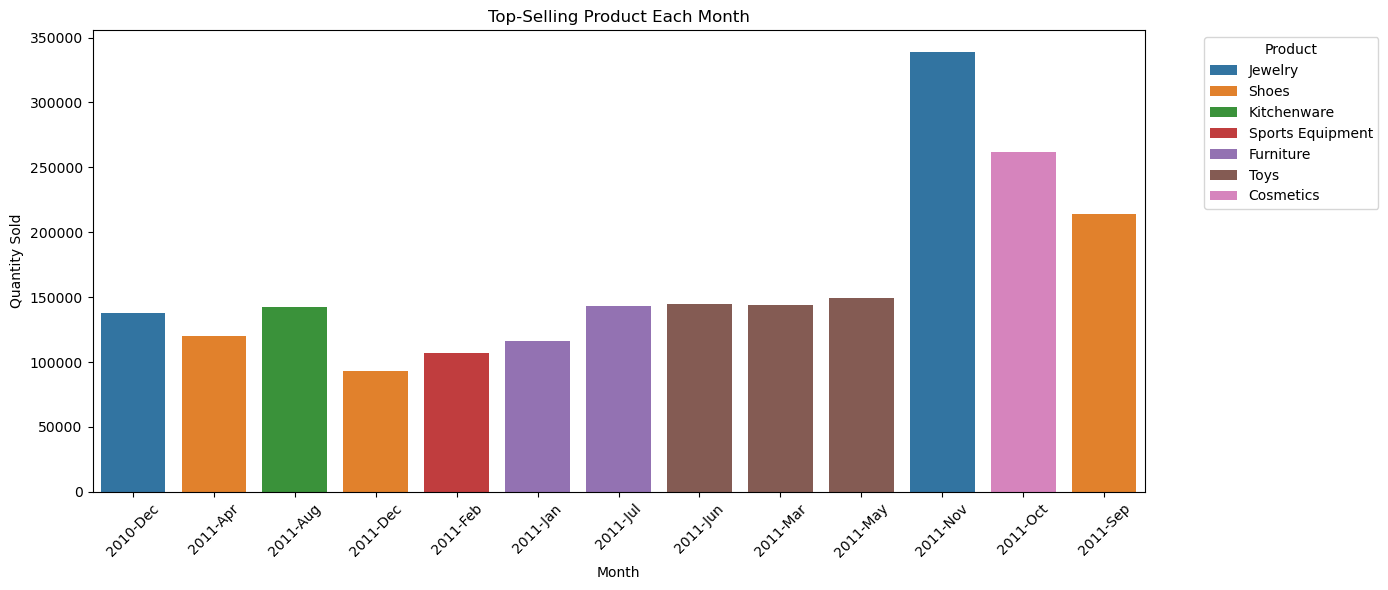

In [32]:
# Visualizing Products sold over time

plt.figure(figsize=(14,6))
sns.barplot(data=top_products_by_month, x='Year_Month', y='Quantity', hue='Description', dodge=False, palette='tab10')
plt.title('Top-Selling Product Each Month')
plt.xlabel('Month')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Investigating top selling products through the months, jewelry sold most in November, cosmetics sold more in October, kitchenware in August etc.

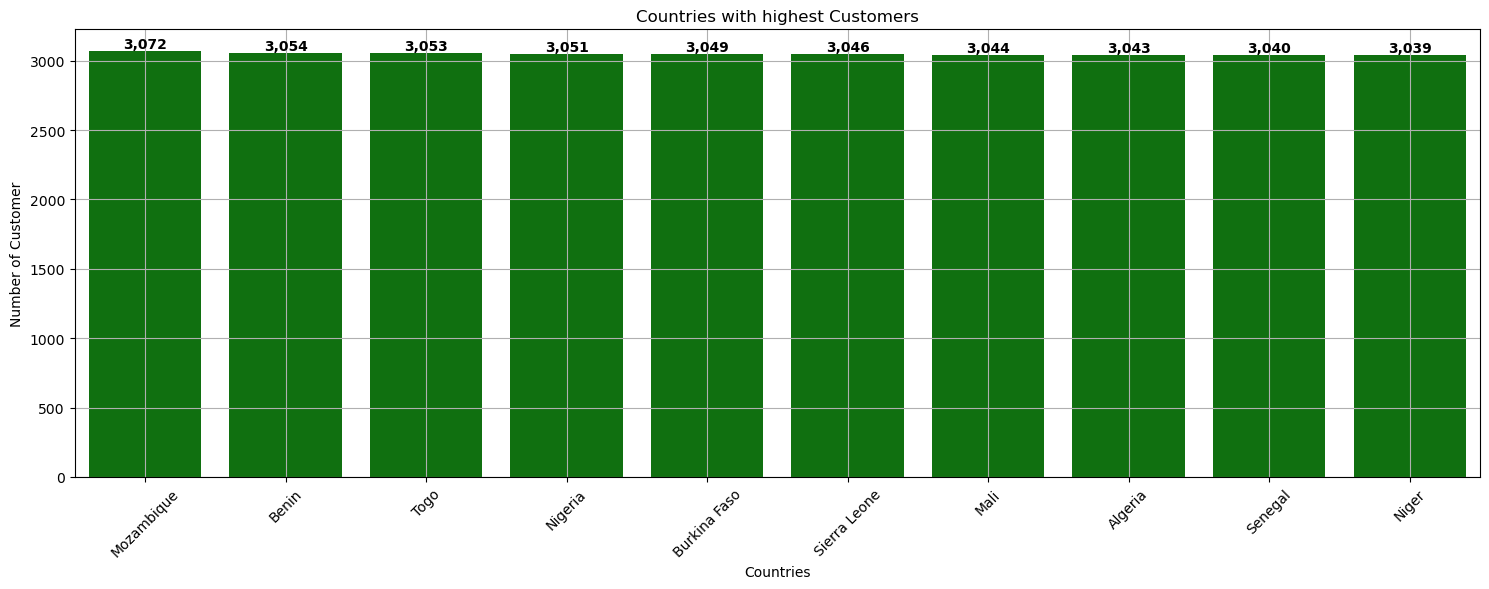

In [33]:
countries_by_customers = df.groupby(['Country'])['CustomerID'].nunique().reset_index().sort_values('CustomerID', ascending=False)
countries_by_customers = countries_by_customers.head(10)

plt.figure(figsize=(15,6))
barplot = sns.barplot(x='Country', y='CustomerID', data= countries_by_customers, color='green')

plt.title('Countries with highest Customers')
plt.xlabel('Countries')
plt.ylabel('Number of Customer')
plt.xticks(rotation=45)
plt.grid(True)

# Add labels on bars
for p in barplot.patches:
    height = p.get_height()
    barplot.text(
        x=p.get_x() + p.get_width() / 2, 
        y=height, 
        s=f'{height:,.0f}',  # Comma formatting & no decimals
        ha='center', 
        va='bottom', 
        fontsize=10, 
        fontweight='bold'
    )

plt.tight_layout()
plt.show()

Mozambique has the highest number of customers

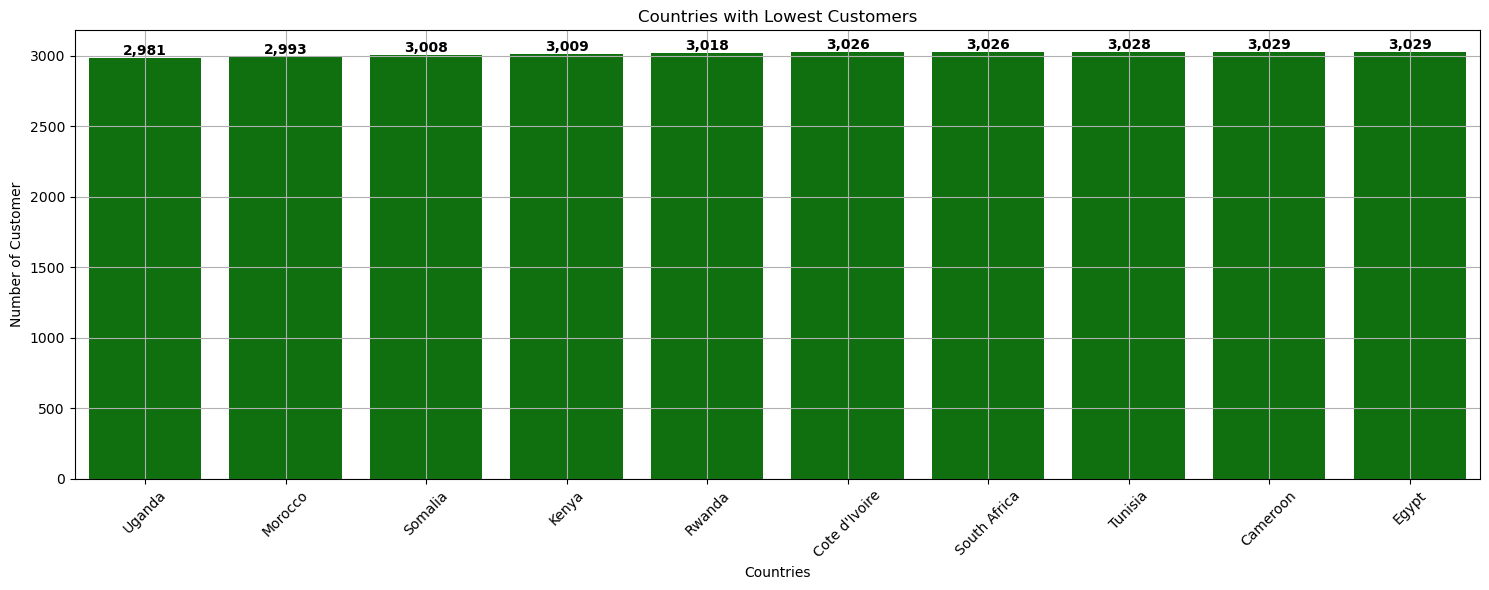

In [34]:
countries_by_customers = df.groupby(['Country'])['CustomerID'].nunique().reset_index().sort_values('CustomerID', ascending=True)
countries_by_customers_least = countries_by_customers[:10]

plt.figure(figsize=(15,6))
barplot = sns.barplot(x='Country', y='CustomerID', data= countries_by_customers_least, color='green')

plt.title('Countries with Lowest Customers')
plt.xlabel('Countries')
plt.ylabel('Number of Customer')
plt.xticks(rotation=45)
plt.grid(True)

# Add labels on bars
for p in barplot.patches:
    height = p.get_height()
    barplot.text(
        x=p.get_x() + p.get_width() / 2, 
        y=height, 
        s=f'{height:,.0f}',  # Comma formatting & no decimals
        ha='center', 
        va='bottom', 
        fontsize=10, 
        fontweight='bold'
    )

plt.tight_layout()
plt.show()

Egypt has the lowest number of customers

## Cohort Analysis

In [35]:
df.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,TotalPrice,InvoiceYear,Quarter,Year_Month,Year_Quarter
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt,664.95,2010,4,2010-Dec,2010-Q4
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali,1862.95,2010,4,2010-Dec,2010-Q4
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali,4796.22,2010,4,2010-Dec,2010-Q4
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa,370.95,2010,4,2010-Dec,2010-Q4
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda,1941.50,2010,4,2010-Dec,2010-Q4


In [36]:
# Writing a function to exclude time and retain only the year and month needed for the cohort analysis

def get_month(x):
    return dt.datetime(x.year, x.month, 1)

df['InvoiceDate']= df['InvoiceDate'].apply(get_month)

In [37]:
df.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,TotalPrice,InvoiceYear,Quarter,Year_Month,Year_Quarter
0,536365,2010-12-01,17850.0,SC1734,Electronics,65,10.23,Egypt,664.95,2010,4,2010-Dec,2010-Q4
1,536365,2010-12-01,17850.0,SC2088,Furniture,95,19.61,Mali,1862.95,2010,4,2010-Dec,2010-Q4
2,536365,2010-12-01,17850.0,SC3463,Books,78,61.49,Mali,4796.22,2010,4,2010-Dec,2010-Q4
3,536365,2010-12-01,17850.0,SC6228,Toys,15,24.73,South Africa,370.95,2010,4,2010-Dec,2010-Q4
4,536365,2010-12-01,17850.0,SC2149,Toys,50,38.83,Rwanda,1941.50,2010,4,2010-Dec,2010-Q4


In [38]:
# creating a function to retrieve cohort date i.e the date of first interaction with the business

def get_cohort_date(df):
    df['Cohort_Date'] = df.groupby('CustomerID')['InvoiceDate'].transform('min')
    return df['Cohort_Date']
df['Cohort_Date'] = get_cohort_date(df)

In [39]:
df.tail(10)

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,TotalPrice,InvoiceYear,Quarter,Year_Month,Year_Quarter,Cohort_Date
541899,581587,2011-12-01,12680.0,SC1744,Furniture,5,63.49,Nigeria,317.45,2011,4,2011-Dec,2011-Q4,2011-08-01
541900,581587,2011-12-01,12680.0,SC3155,Toys,28,17.31,Nigeria,484.68,2011,4,2011-Dec,2011-Q4,2011-08-01
541901,581587,2011-12-01,12680.0,SC2880,Electronics,41,78.23,Tunisia,3207.43,2011,4,2011-Dec,2011-Q4,2011-08-01
541902,581587,2011-12-01,12680.0,SC4436,Sports Equipment,58,39.06,Sudan,2265.48,2011,4,2011-Dec,2011-Q4,2011-08-01
541903,581587,2011-12-01,12680.0,SC9552,Furniture,74,5.99,Ethiopia,443.26,2011,4,2011-Dec,2011-Q4,2011-08-01
541904,581587,2011-12-01,12680.0,SC5440,Furniture,25,36.53,Mozambique,913.25,2011,4,2011-Dec,2011-Q4,2011-08-01
541905,581587,2011-12-01,12680.0,SC3576,Cloths,94,90.65,Tunisia,8521.10,2011,4,2011-Dec,2011-Q4,2011-08-01
541906,581587,2011-12-01,12680.0,SC5283,Furniture,14,40.07,Somalia,560.98,2011,4,2011-Dec,2011-Q4,2011-08-01
541907,581587,2011-12-01,12680.0,SC1099,Cosmetics,45,79.83,Senegal,3592.35,2011,4,2011-Dec,2011-Q4,2011-08-01
541908,581587,2011-12-01,12680.0,SC9276,Toys,6,46.62,Ethiopia,279.72,2011,4,2011-Dec,2011-Q4,2011-08-01


## Cohort Index

In [40]:
# defining a function to retrieve the first year, and first month a customer transacted

def get_year_and_month(df, col):
    month = df[col].dt.month
    year = df[col].dt.year
    return month, year

first_month, first_year = get_year_and_month(df, 'Cohort_Date')

In [41]:
first_month

0         12
1         12
2         12
3         12
4         12
          ..
541904     8
541905     8
541906     8
541907     8
541908     8
Name: Cohort_Date, Length: 406829, dtype: int32

In [42]:
first_year

0         2010
1         2010
2         2010
3         2010
4         2010
          ... 
541904    2011
541905    2011
541906    2011
541907    2011
541908    2011
Name: Cohort_Date, Length: 406829, dtype: int32

In [43]:
# retrieving the latest year, and latest month a customer transacted

latest_month, latest_year = get_year_and_month(df, 'InvoiceDate')

In [44]:
latest_month

0         12
1         12
2         12
3         12
4         12
          ..
541904    12
541905    12
541906    12
541907    12
541908    12
Name: InvoiceDate, Length: 406829, dtype: int32

In [45]:
latest_year

0         2010
1         2010
2         2010
3         2010
4         2010
          ... 
541904    2011
541905    2011
541906    2011
541907    2011
541908    2011
Name: InvoiceDate, Length: 406829, dtype: int32

In [46]:
# defining a function to determine the year and month difference
def create_cohort_index(latest_month, latest_year, first_month, first_year):
    year_difference = latest_year - first_year
    month_difference = latest_month - first_month
    index = year_difference*12 + month_difference+1
    return index


In [47]:
df['Cohort_index'] = create_cohort_index(latest_month, latest_year, first_month, first_year)
df

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,TotalPrice,InvoiceYear,Quarter,Year_Month,Year_Quarter,Cohort_Date,Cohort_index
0,536365,2010-12-01,17850.0,SC1734,Electronics,65,10.23,Egypt,664.95,2010,4,2010-Dec,2010-Q4,2010-12-01,1
1,536365,2010-12-01,17850.0,SC2088,Furniture,95,19.61,Mali,1862.95,2010,4,2010-Dec,2010-Q4,2010-12-01,1
2,536365,2010-12-01,17850.0,SC3463,Books,78,61.49,Mali,4796.22,2010,4,2010-Dec,2010-Q4,2010-12-01,1
3,536365,2010-12-01,17850.0,SC6228,Toys,15,24.73,South Africa,370.95,2010,4,2010-Dec,2010-Q4,2010-12-01,1
4,536365,2010-12-01,17850.0,SC2149,Toys,50,38.83,Rwanda,1941.50,2010,4,2010-Dec,2010-Q4,2010-12-01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,2011-12-01,12680.0,SC5440,Furniture,25,36.53,Mozambique,913.25,2011,4,2011-Dec,2011-Q4,2011-08-01,5
541905,581587,2011-12-01,12680.0,SC3576,Cloths,94,90.65,Tunisia,8521.10,2011,4,2011-Dec,2011-Q4,2011-08-01,5
541906,581587,2011-12-01,12680.0,SC5283,Furniture,14,40.07,Somalia,560.98,2011,4,2011-Dec,2011-Q4,2011-08-01,5
541907,581587,2011-12-01,12680.0,SC1099,Cosmetics,45,79.83,Senegal,3592.35,2011,4,2011-Dec,2011-Q4,2011-08-01,5


## Cohort Table

In [48]:
Cohort_info = df.groupby(['Cohort_Date', 'Cohort_index'])['CustomerID'].nunique().reset_index()

In [49]:
Cohort_info.rename(columns = {'CustomerID' : 'Number of customers'}, inplace = True)

In [50]:
Cohort_info

,Cohort_Date,Cohort_index,Number of customers
0,2010-12-01,1,948
1,2010-12-01,2,362
2,2010-12-01,3,317
3,2010-12-01,4,367
4,2010-12-01,5,341
...,...,...,...
86,2011-10-01,2,93
87,2011-10-01,3,46
88,2011-11-01,1,321
89,2011-11-01,2,43


In [51]:
Cohort_table = Cohort_info.pivot(index= 'Cohort_Date', columns = ['Cohort_index'], values= 'Number of customers')
Cohort_table.index = Cohort_table.index.strftime('%B %Y')
Cohort_table

Cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
Cohort_Date,,,,,,,,,,,,,
December 2010,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
January 2011,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
February 2011,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
March 2011,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
April 2011,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
May 2011,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
June 2011,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
July 2011,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August 2011,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='Cohort_index', ylabel='Cohort_Date'>

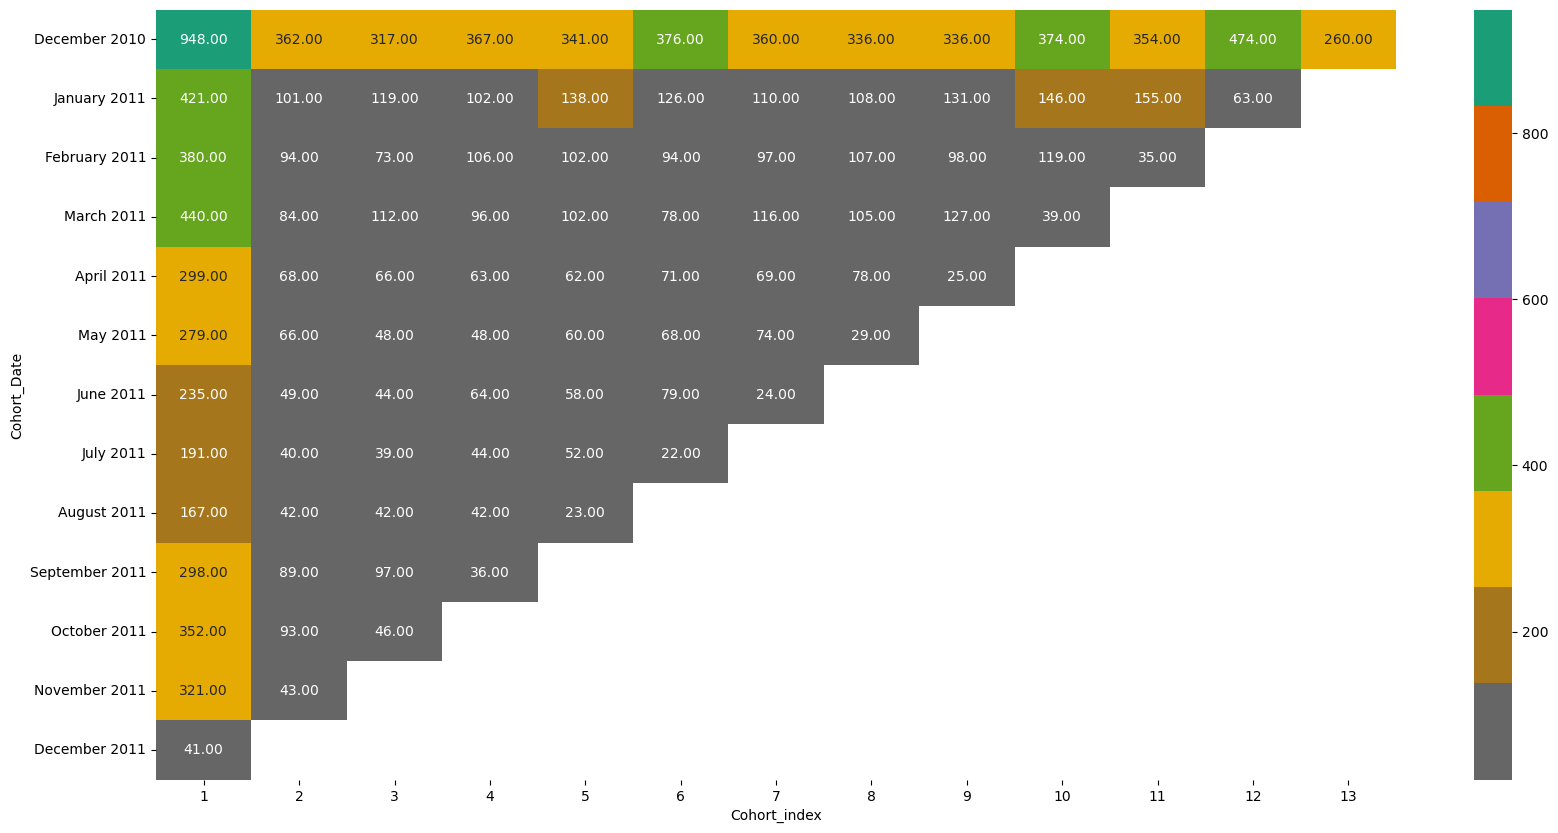

In [52]:
plt.figure(figsize=(20,10))
sns.heatmap(Cohort_table, annot=True, cmap= 'Dark2_r', fmt = '.2f')

In [53]:
# to get the percentage of customer's retained from the cohort table

new_cohort_table = Cohort_table.divide(Cohort_table.iloc[:,0], axis = 0)
new_cohort_table

Cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
Cohort_Date,,,,,,,,,,,,,
December 2010,1.0,0.381857,0.334388,0.387131,0.359705,0.396624,0.379747,0.354430,0.354430,0.394515,0.373418,0.500000,0.274262
January 2011,1.0,0.239905,0.282660,0.242280,0.327791,0.299287,0.261283,0.256532,0.311164,0.346793,0.368171,0.149644,NaN
February 2011,1.0,0.247368,0.192105,0.278947,0.268421,0.247368,0.255263,0.281579,0.257895,0.313158,0.092105,NaN,NaN
March 2011,1.0,0.190909,0.254545,0.218182,0.231818,0.177273,0.263636,0.238636,0.288636,0.088636,NaN,NaN,NaN
April 2011,1.0,0.227425,0.220736,0.210702,0.207358,0.237458,0.230769,0.260870,0.083612,NaN,NaN,NaN,NaN
May 2011,1.0,0.236559,0.172043,0.172043,0.215054,0.243728,0.265233,0.103943,NaN,NaN,NaN,NaN,NaN
June 2011,1.0,0.208511,0.187234,0.272340,0.246809,0.336170,0.102128,NaN,NaN,NaN,NaN,NaN,NaN
July 2011,1.0,0.209424,0.204188,0.230366,0.272251,0.115183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August 2011,1.0,0.251497,0.251497,0.251497,0.137725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='Cohort_index', ylabel='Cohort_Date'>

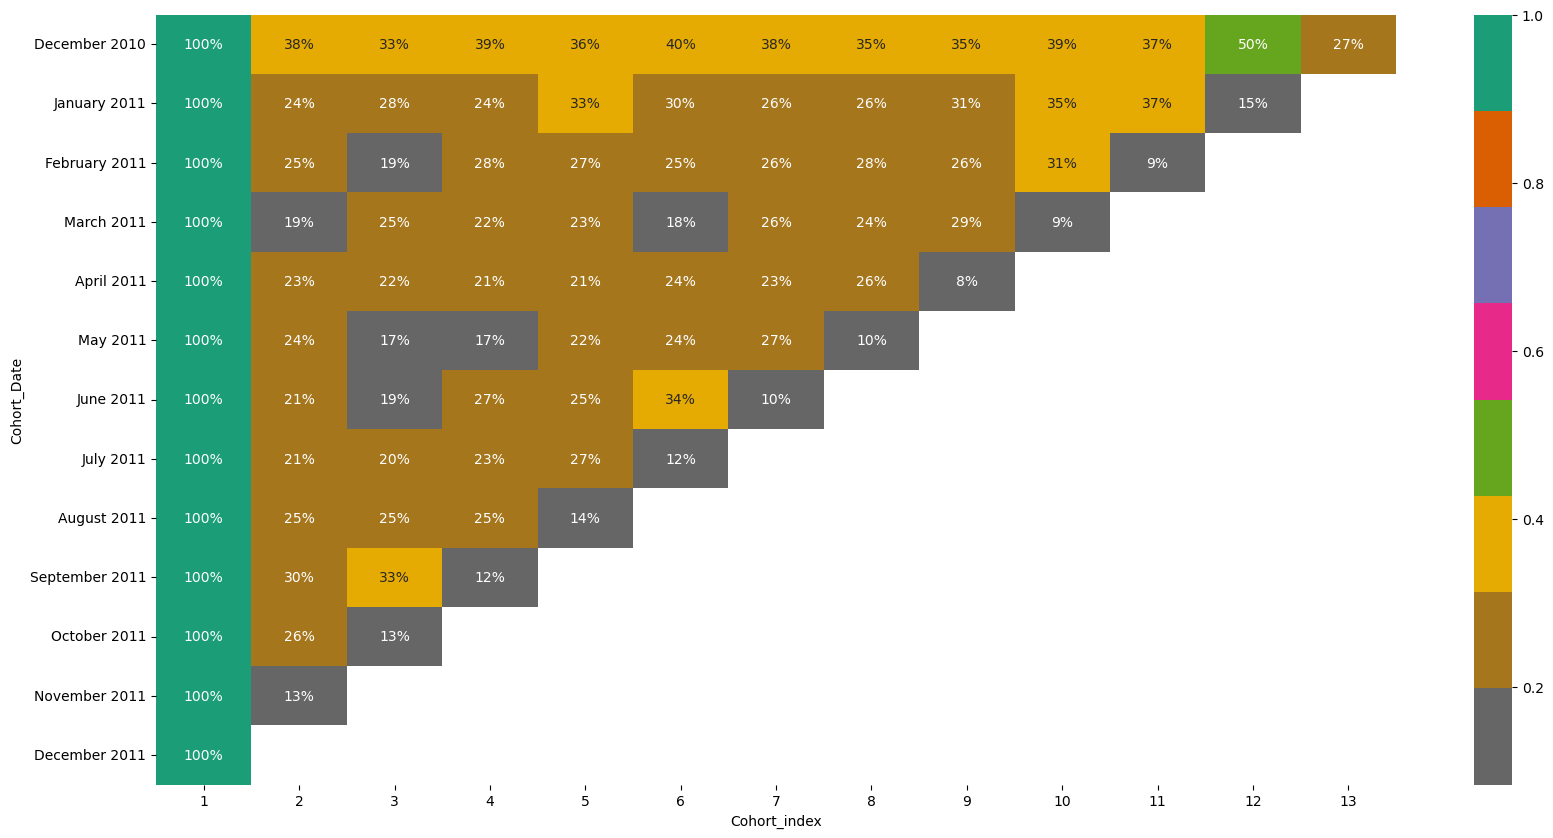

In [54]:
plt.figure(figsize=(20,10))
sns.heatmap(new_cohort_table, annot=True, cmap= 'Dark2_r', fmt = '.0%')

#### OBSERVATIONS

A healthy retention rate for e-commerce platforms is typically considered to be in the range of 20% to 40%. This means that 20% to 40% of your customers continue to make purchases from your e-commerce platform after their initial purchase.

December 2010 Cohort Outperforms Others: The fact that the December 2010 cohort has a retention rate above 30% is a positive sign. It suggests that this group of customers has remained engaged with your e-commerce platform over time. This could be due to various factors, such as the quality of your products/services, effective marketing, or a strong customer retention strategy.

Decline in December 2011: The observation that all cohorts have low retention rates in December 2011 suggests that there may have been specific challenges or issues affecting customer retention during that time. It's important to investigate what might have caused this decline and whether it's a one-time event or a recurring pattern

Variability in Retention Rates: The range of retention rates, from a minimum of 8% to a maximum of 50%, suggests that there is significant variability in how different cohorts of customers are behaving. While 8% is relatively low, 50% is relatively high, considering the standard e-commerce retention rates mentioned earlier.

#### RECOMMENDATIONS

Identify Factors Driving High Retention (December 2010): Analyze what factors have contributed to the high retention rate for the December 2010 cohort. Was there a specific marketing campaign, product improvement, or customer engagement strategy that worked well for this group? Try to replicate successful strategies for other cohorts.

Investigate December 2011 Drop: Investigate why all cohorts have low retention rates on December 2011. It might involve analyzing customer feedback, product quality, customer service, or any changes in your business operations during that time. Identifying and addressing the root causes of this drop is crucial for improving future retention rates.

Set Realistic Targets: While the standard e-commerce retention rate range is 20% to 40%, it's essential to set targets that are specific to your business and its circumstances. Aim to improve retention rates gradually over time based on your historical data and industry benchmarks.

Implement Retention Strategies: Develop and implement retention strategies that are tailored to different cohorts of customers. Personalized marketing, loyalty programs, and targeted communication can help improve retention rates.

Continuously Monitor and Adapt: Retention rates can change over time due to various factors, so it's crucial to continuously monitor them and adapt your strategies accordingly. Regularly analyzing cohort data and customer behavior will help you make informed decisions to improve retention.

In addtion to observing the behaviour of each cohort, we can create a table which shows the average quantity of product bought by each cohort and how it fluctuates.

**Quantity bought**

In [55]:
df.head(2)

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,TotalPrice,InvoiceYear,Quarter,Year_Month,Year_Quarter,Cohort_Date,Cohort_index
0,536365,2010-12-01,17850.0,SC1734,Electronics,65,10.23,Egypt,664.95,2010,4,2010-Dec,2010-Q4,2010-12-01,1
1,536365,2010-12-01,17850.0,SC2088,Furniture,95,19.61,Mali,1862.95,2010,4,2010-Dec,2010-Q4,2010-12-01,1


In [56]:
quantity_bought = df.groupby(['Cohort_Date', 'Cohort_index'])['Quantity'].sum().reset_index()
quantity_bought

,Cohort_Date,Cohort_index,Quantity
0,2010-12-01,1,1350834
1,2010-12-01,2,546873
2,2010-12-01,3,462374
3,2010-12-01,4,613244
4,2010-12-01,5,510943
...,...,...,...
86,2011-10-01,2,181888
87,2011-10-01,3,44776
88,2011-11-01,1,574330
89,2011-11-01,2,56021


In [57]:
quantity_table = quantity_bought.pivot(index='Cohort_Date', columns = ['Cohort_index'], values = 'Quantity')
quantity_table.index = quantity_table.index.strftime('%B %Y')
quantity_table

Cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
Cohort_Date,,,,,,,,,,,,,
December 2010,1350834.0,546873.0,462374.0,613244.0,510943.0,636443.0,597676.0,604504.0,600481.0,757806.0,725896.0,1165046.0,375469.0
January 2011,559013.0,121074.0,155931.0,120023.0,194675.0,166585.0,144835.0,149848.0,200661.0,258400.0,330607.0,76504.0,NaN
February 2011,450020.0,74008.0,98850.0,122918.0,111386.0,104214.0,108442.0,135276.0,151180.0,145405.0,21787.0,NaN,NaN
March 2011,563434.0,74215.0,125519.0,119480.0,122078.0,107554.0,139852.0,182259.0,212009.0,49685.0,NaN,NaN,NaN
April 2011,371021.0,71541.0,66410.0,65115.0,70639.0,105065.0,97319.0,110572.0,27119.0,NaN,NaN,NaN,NaN
May 2011,308885.0,55453.0,44637.0,45690.0,76473.0,118534.0,97156.0,41183.0,NaN,NaN,NaN,NaN,NaN
June 2011,285867.0,47847.0,35516.0,76483.0,88504.0,127400.0,31264.0,NaN,NaN,NaN,NaN,NaN,NaN
July 2011,254889.0,25983.0,68721.0,69466.0,91529.0,26831.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August 2011,243542.0,80156.0,144849.0,141888.0,45405.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='Cohort_index', ylabel='Cohort_Date'>

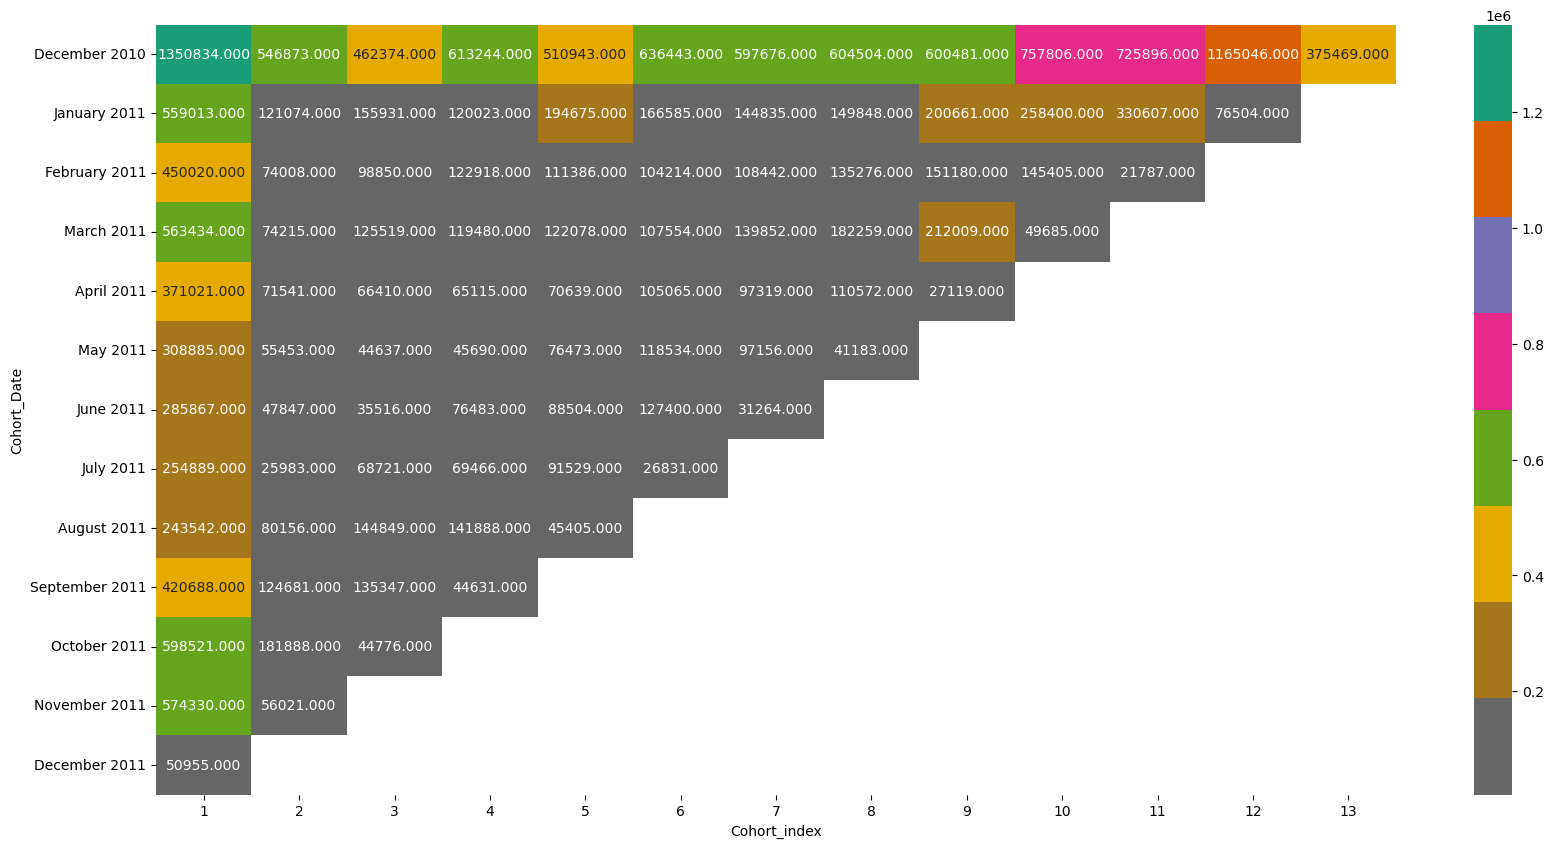

In [58]:
plt.figure(figsize=(20,10))
sns.heatmap(quantity_table, annot=True, cmap= 'Dark2_r', fmt = '.3f')

#### Observations

Although there is significant drop in customer retention after their first month as observed on the previous chart, the average quantity bought is not experiencing much fluctuations. Meaning there is possibiity that a few customers tends to puchase alot of product, therefore maintaining the average value

#### Recommendation

This can serve as a signal to carryout targetted marketing in countries where more quantites are sold in contrast to targeting countries where more customers are acquired.

<Axes: xlabel='Cohort_index', ylabel='Cohort_Date'>

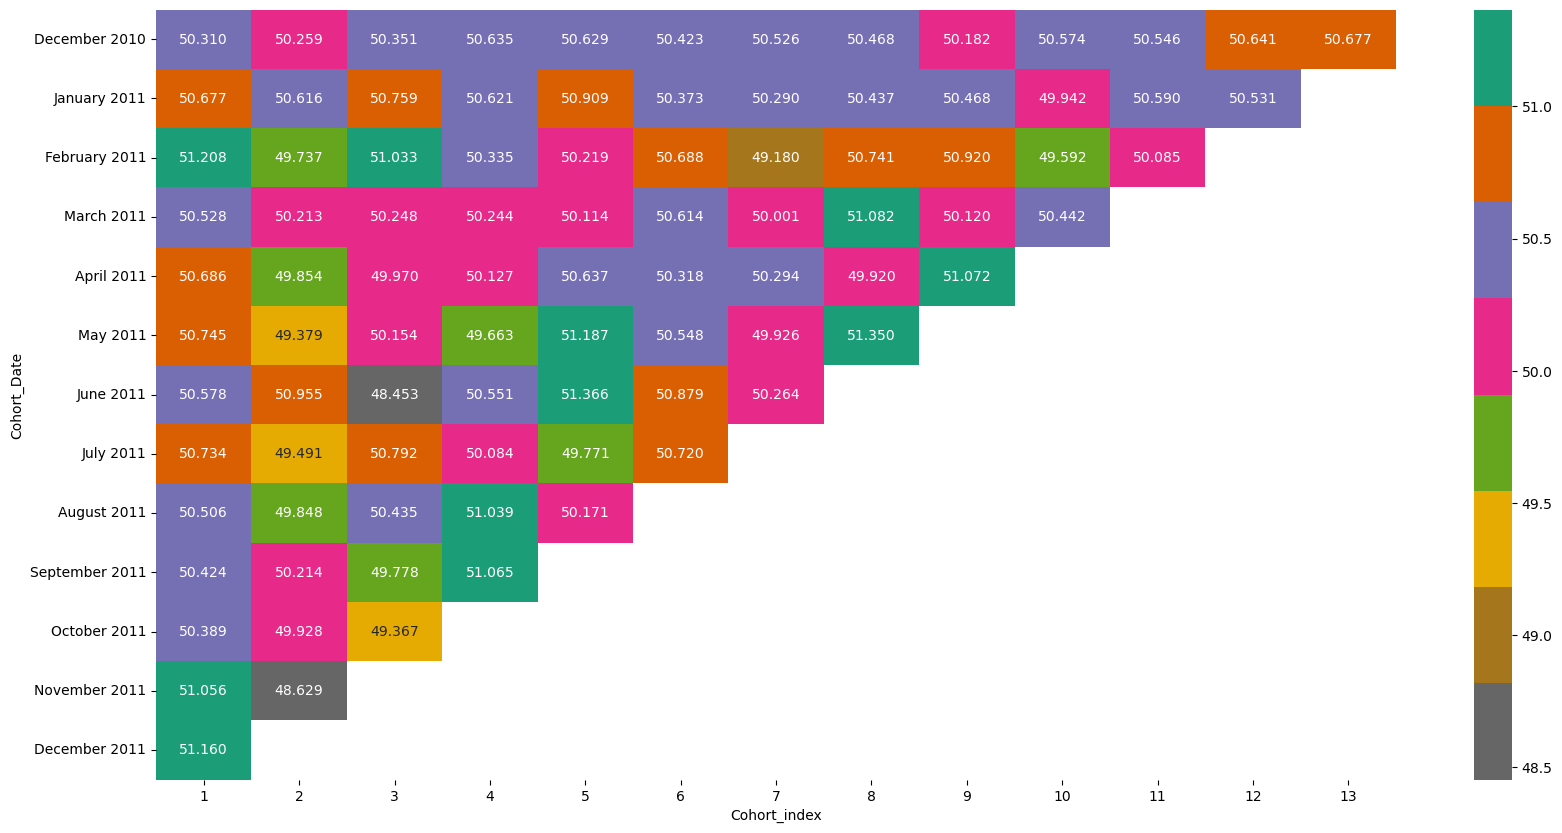

In [59]:
# Mean/ Average quantity bought per cohort

avg_quantity_bought = df.groupby(['Cohort_Date', 'Cohort_index'])['Quantity'].mean().reset_index()

avg_quantity_table = avg_quantity_bought.pivot(index='Cohort_Date', columns = ['Cohort_index'], values = 'Quantity')
avg_quantity_table.index = avg_quantity_table.index.strftime('%B %Y')

plt.figure(figsize=(20,10))
sns.heatmap(avg_quantity_table, annot=True, cmap= 'Dark2_r', fmt = '.3f')

#### Observations
The average quantity bought is quite stable across all cohorts